<a href="https://colab.research.google.com/github/vmpreciado/NETS3120/blob/main/Intro2NetworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install networkx  # Install NetworkX using pip

Code from Section II.C (NETS-3120).
Using NetworkX in Python...

In [2]:
import networkx as nx  # Import the networkx library
G = nx.Graph()         # Create an empty undirected graph G
G.add_edge('1', '2')   # Add an edge between nodes 'A' and 'B'
print(G.nodes)         # Print the list (in square brackets) of nodes in the graph
print(G.edges)         # Print the list (in square brackets) of edges (2-tuples in parenthesis) in the graph

['1', '2']
[('1', '2')]


Add more edges in the graph...

In [3]:
G.add_edges_from([('2', '3'), ('3', '4'), ('4', '1'), ('1', '1')]) # The names of the nodes do not have to be numbers, can be any 'string'
print(G.nodes)         # Print the list of nodes in the graph
print(G.edges)         # Print the list of edges (2-tuples) in the graph

['1', '2', '3', '4']
[('1', '2'), ('1', '4'), ('1', '1'), ('2', '3'), ('3', '4')]


Plot the graph G

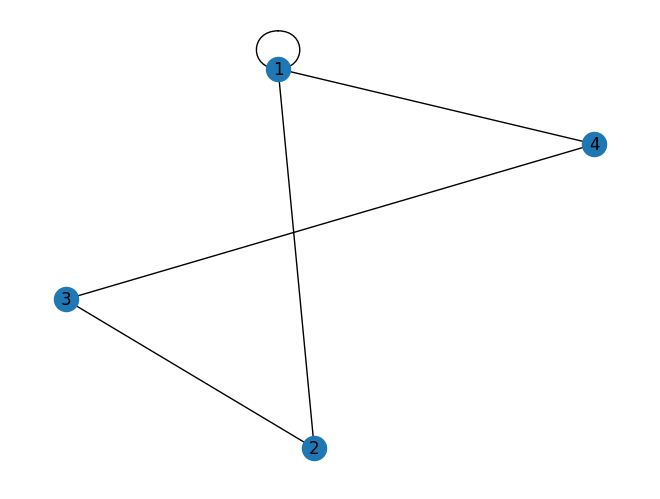

In [4]:
import matplotlib.pyplot as plt  # Import the Matplotlib library's pyplot module
nx.draw(G, with_labels=True)     # Use NetworkX to draw the graph 'G' with node labels
plt.show()                       # Display the plot created using Matplotlib

We can use several layouts to plot a graph.

Let's load a more complicated graph and plot it using several layouts.

The graph is the Zachary graph.

In [5]:
# Load the Zachary's Karate Club graph from the NetworkX library of preloaded graph
G = nx.karate_club_graph()

Let's draw this graph using a random layout...

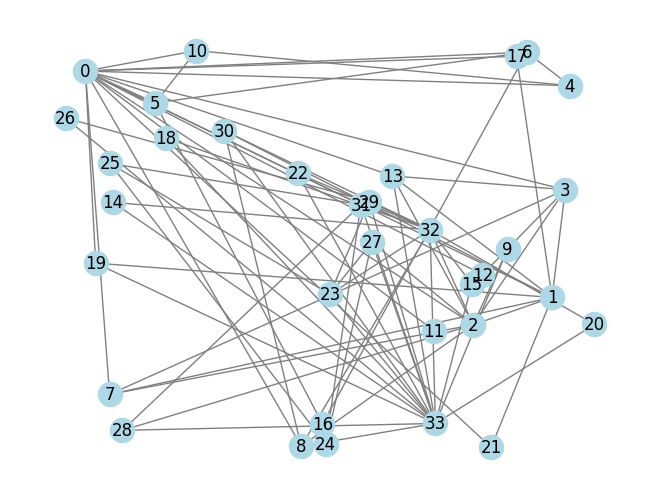

In [6]:
# Draw the undirected graph using a random layout (nodes locate at random on the plane)
pos = nx.random_layout(G)  # positions for all nodes placed randomly
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()  # Show the plot

We can also use a circular layout...

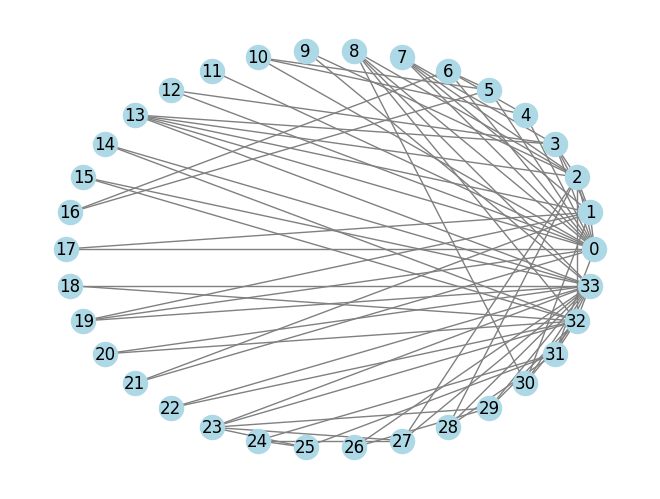

In [7]:
# Draw the graph using a circular layout
pos = nx.circular_layout(G)  # positions for all nodes in a circle
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()  # Show the plot

Let's try the spectral layout...

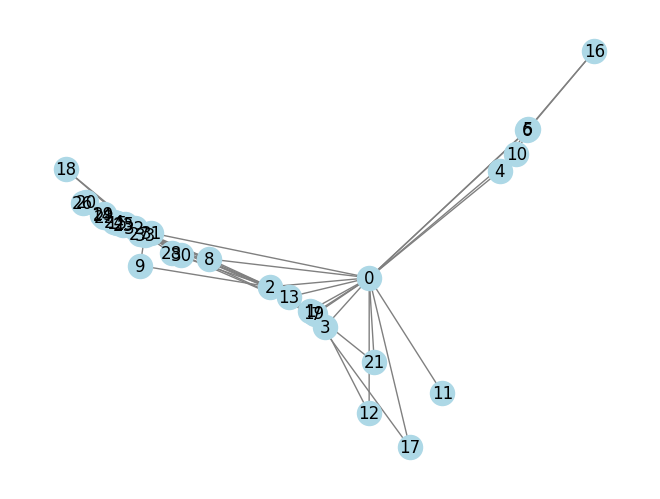

In [8]:
# Draw the graph using a spectral layout (based on spectral embeddings--to be covered later in the course)
pos = nx.spectral_layout(G)  # positions for all nodes using the spectral layout
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()  # Show the plot

Finally, the spring layout...

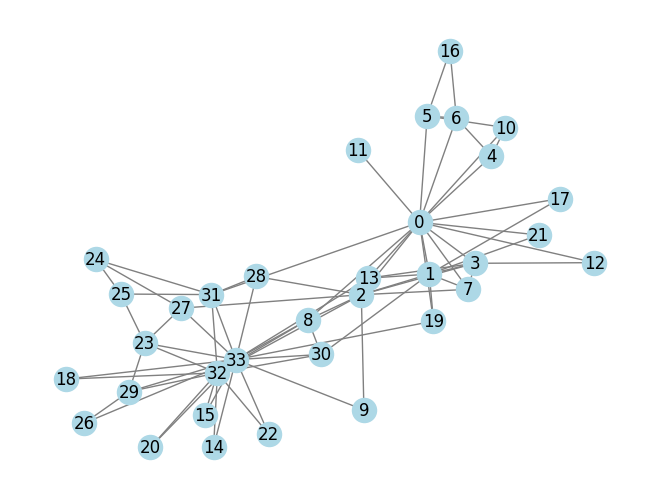

In [9]:
# Draw the graph using the spring layout
pos = nx.spring_layout(G)  # positions for all nodes based on the physics of masses (nodes) connected by springs (edges)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()  # Show the plot

Let's dive into the various representation we have studied to represent this graph.

Let's start with the list of edges (LoE)...

In [16]:
# Get the list of edges of the graph G
edges = list(G.edges()) # This call the 'edges' method in the graph object 'G'. Then it convertes it into a list for easy visualization
print(edges)  # Print the edges

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


Notice that, in this case, the labels of the nodes are not 'strings', but natural numbers starting at 0 (this is the common way of indexing in Python). In other words, the first node in the graph is labeled with 0 (not '0' or '1').

Let's take a look at the adjacency list. This is the most convenient representation while dealing with very large (and sparse) graphs...

In [22]:
# Get the adjacency list of the graph, which shows each node's neighboring nodes
adjacency_list = G.adjacency() # This calls the 'adjacency' method on the object 'G'

# You can access the list of neighbors of a particular node as indicated below
target_node = 0 # Define the node for which you want to see the adjacent nodes
neighbours = G[target_node] # Directly access the adjacency list for the target node
print(f"{target_node}: {list(neighbours)}")

0: [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]


You can access the full adjacency list using a for loop

In [23]:
# Iterate and print each node with its list of adjacent (neighboring) nodes
for node, neighbours in adjacency_list:
    print(f"{node}: {list(neighbours)}")

0: [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]
1: [0, 2, 3, 7, 13, 17, 19, 21, 30]
2: [0, 1, 3, 7, 8, 9, 13, 27, 28, 32]
3: [0, 1, 2, 7, 12, 13]
4: [0, 6, 10]
5: [0, 6, 10, 16]
6: [0, 4, 5, 16]
7: [0, 1, 2, 3]
8: [0, 2, 30, 32, 33]
9: [2, 33]
10: [0, 4, 5]
11: [0]
12: [0, 3]
13: [0, 1, 2, 3, 33]
14: [32, 33]
15: [32, 33]
16: [5, 6]
17: [0, 1]
18: [32, 33]
19: [0, 1, 33]
20: [32, 33]
21: [0, 1]
22: [32, 33]
23: [25, 27, 29, 32, 33]
24: [25, 27, 31]
25: [23, 24, 31]
26: [29, 33]
27: [2, 23, 24, 33]
28: [2, 31, 33]
29: [23, 26, 32, 33]
30: [1, 8, 32, 33]
31: [0, 24, 25, 28, 32, 33]
32: [2, 8, 14, 15, 18, 20, 22, 23, 29, 30, 31, 33]
33: [8, 9, 13, 14, 15, 18, 19, 20, 23, 26, 27, 28, 29, 30, 31, 32, 22]


Finally, let's take a look at the pattern of the adjacency matrix.

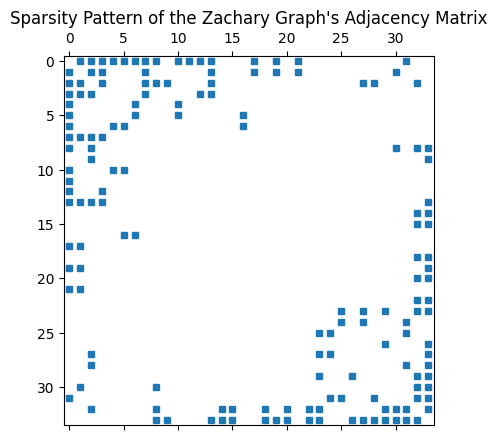

In [12]:
import numpy as np

# Get the adjacency matrix (an array) as a sparse matrix
adj_matrix = nx.adjacency_matrix(G)

# Use Matplotlib's spy function to plot the sparsity pattern of the adjacency matrix
plt.spy(adj_matrix, markersize=5)
plt.title("Sparsity Pattern of the Zachary Graph's Adjacency Matrix")
plt.show()

In this plot, the blue squares represent the location of the entries of the adjacency matrix in which the value is '1'.

Notice the symmetry of the matrix around the main diagonal. This is due to the fact that the matrix is undirected.

Let's play now with a directed graph. In particular,

NetworkX can also handle directed and weighted graphs.

Let's build a small digraph with 4 nodes...


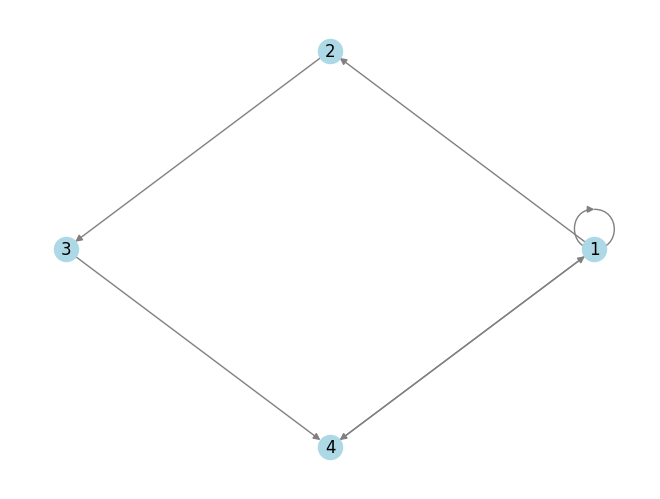

In [24]:
# Create an empty directed graph
D = nx.DiGraph()

# Add nodes
D.add_nodes_from([1, 2, 3, 4])

# Add directed edges in a single line using a list of tuples
D.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (1, 4), (1, 1)])

# Draw the graph using a circular layout
pos = nx.circular_layout(D)  # Use circular layout for node positioning
nx.draw(D, pos, with_labels=True, node_color='lightblue', edge_color='gray', arrows=True)
plt.show()  # Show the plot

Let's also consider weights. In particular, let's assign a random integer weight between 1 and 10 to each edge and plot the resulting weighted digraph...

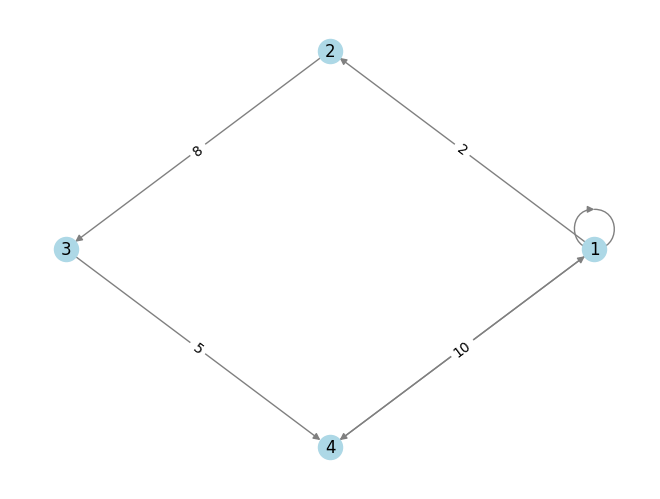

In [28]:
import random

# Assign a random weight between 1 and 10 to each edge
for (u, v) in D.edges():
    D[u][v]['weight'] = random.randint(1, 10)

# Draw the graph using a circular layout
pos = nx.circular_layout(D)  # Use circular layout for node positioning
nx.draw(D, pos, with_labels=True, node_color='lightblue', edge_color='gray', arrows=True)

# Display edge weights
edge_labels = nx.get_edge_attributes(D, 'weight')
nx.draw_networkx_edge_labels(D, pos, edge_labels=edge_labels)
plt.show()  # Show the plot

... continue in Notebook Twitter.ipynb